# Portfolio Assginment: Text Classification

CS 4395.002 Human Language Technologies

Dr. Mazidi

Henry Kim HTK180000

## Overview
This Kaggle notebook explores several approaches to classifying Reddit comments from the [Physics vs Chemistry vs Biology](https://www.kaggle.com/datasets/vivmankar/physics-vs-chemistry-vs-biology/code?datasetId=1687228&sortBy=dateRun&tab=profile) dataset.

https://www.kaggle.com/datasets/vivmankar/physics-vs-chemistry-vs-biology/code?datasetId=1687228&sortBy=dateRun&tab=profile

In [39]:
# Import libraries
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns 

import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [40]:
# Load the train and test data 
train = pd.read_csv("../input/physics-vs-chemistry-vs-biology/dataset/train.csv")
test = pd.read_csv("../input/physics-vs-chemistry-vs-biology/dataset/test.csv")

The training data csv contains 8695 examples. Each observation has an Id column with an identifier for the observation, the text of the comment, and a Topic that can be either Physics, Chemsitry, or Biology.

In [41]:
print(train.shape)
print(train.head())

(8695, 3)
       Id                                            Comment      Topic
0   0x840  A few things. You might have negative- frequen...    Biology
1   0xbf0  Is it so hard to believe that there exist part...    Physics
2  0x1dfc                                     There are bees    Biology
3   0xc7e  I'm a medication technician. And that's alot o...    Biology
4   0xbba                     Cesium is such a pretty metal.  Chemistry


The testing data csv contains 1586 examples and the same columns as the training data.

In [42]:
print(test.shape)
print(test.head())

(1586, 3)
       Id                                            Comment      Topic
0  0x1aa9  Personally I have no idea what my IQ is. I’ve ...    Biology
1   0x25e  I'm skeptical. A heavier lid would be needed t...    Physics
2  0x1248  I think I have 100 cm of books on the subject....    Biology
3   0x2b9  Is chemistry hard in uni. Ive read somewhere t...  Chemistry
4  0x24af  In addition to the other comment, you can crit...    Physics


For this dataset, we will featurize the comment text to predict the comment's topic. Here are the distributions of the topics in the data.

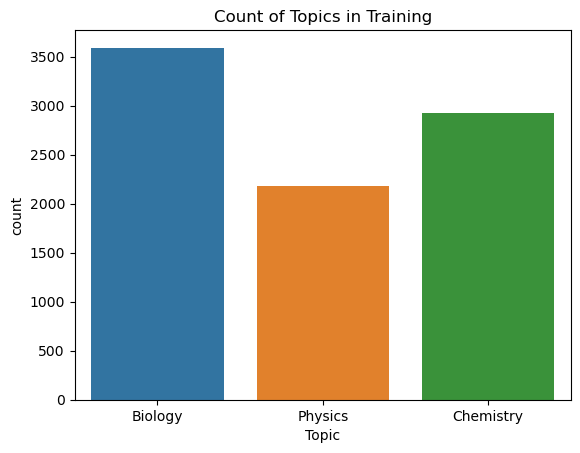

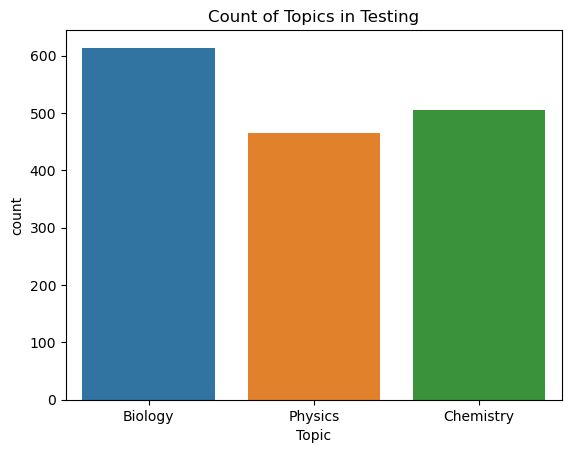

In [43]:
sns.countplot(data=train, x='Topic')
plt.title("Count of Topics in Training")
plt.show()

sns.countplot(data=test, x='Topic')
plt.title("Count of Topics in Testing")
plt.show()

## 1. Naive Bayes

Let's try using a Naive Bayes classifier, which is a linear and generative classifier that assumes features are independent.  

### a) Word Count Vectorization
First we'll try using the number of times each word appears as the set of features without preprocessing the data. We get an overall accuracy of 85% and F1 scores above 80% for all categories.

In [44]:
X_train = train['Comment']
X_test = test['Comment']
y_train = train['Topic']
y_test = test['Topic']

# Convert to word count vectors
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Make predictions and show confusion matrix
predictions = naive_bayes.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[523  65  26]
 [ 46 426  34]
 [ 27  46 393]]
              precision    recall  f1-score   support

     Biology       0.88      0.85      0.86       614
   Chemistry       0.79      0.84      0.82       506
     Physics       0.87      0.84      0.86       466

    accuracy                           0.85      1586
   macro avg       0.85      0.85      0.85      1586
weighted avg       0.85      0.85      0.85      1586



### b) Word Count Vectorization and Preprocessing
This time we will preprocess the text by removing the stop words and converting numbers and punctuation to constants. We end up with the same overall accuracy, but a few prediction examples are different.

In [45]:
X_train = train['Comment']
X_test = test['Comment']
y_train = train['Topic']
y_test = test['Topic']

# Lowercase the text
X_train = X_train.str.lower()
X_test = X_test.str.lower()

# Filter numbers and punctuation
X_train.replace('[\d][\d]+', ' num ', regex=True, inplace=True)
X_train.replace('[!@#*][!@#*]+', ' punct ', regex=True, inplace=True)
X_test.replace('[\d][\d]+', ' num ', regex=True, inplace=True)
X_test.replace('[!@#*][!@#*]+', ' punct ', regex=True, inplace=True)

# Convert to word count vectors
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Make predictions and show confusion matrix
predictions = naive_bayes.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[515  65  34]
 [ 36 436  34]
 [ 21  44 401]]
              precision    recall  f1-score   support

     Biology       0.90      0.84      0.87       614
   Chemistry       0.80      0.86      0.83       506
     Physics       0.86      0.86      0.86       466

    accuracy                           0.85      1586
   macro avg       0.85      0.85      0.85      1586
weighted avg       0.86      0.85      0.85      1586



### c) Binary Vectorization and Preprocessing
This time we will preprocess the text and simply use the presence or absence of the word as the set of features. The overall accuracy for this approach is slightly worse than using word counts.

In [46]:
X_train = train['Comment']
X_test = test['Comment']
y_train = train['Topic']
y_test = test['Topic']

# Lowercase the text
X_train = X_train.str.lower()
X_test = X_test.str.lower()

# Filter numbers and punctuation
X_train.replace('[\d][\d]+', ' num ', regex=True, inplace=True)
X_train.replace('[!@#*][!@#*]+', ' punct ', regex=True, inplace=True)
X_test.replace('[\d][\d]+', ' num ', regex=True, inplace=True)
X_test.replace('[!@#*][!@#*]+', ' punct ', regex=True, inplace=True)

# Convert to word count vectors
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), binary = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Naive Bayes
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train, y_train)

# Make predictions and show confusion matrix
predictions = naive_bayes.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[496  73  45]
 [ 42 417  47]
 [ 25  41 400]]
              precision    recall  f1-score   support

     Biology       0.88      0.81      0.84       614
   Chemistry       0.79      0.82      0.80       506
     Physics       0.81      0.86      0.84       466

    accuracy                           0.83      1586
   macro avg       0.83      0.83      0.83      1586
weighted avg       0.83      0.83      0.83      1586



### d) Tf-Idf Vectorization and Preprocessing
This time we will preprocess the text and use tf-idf scores as the set of features. The overall accuracy of this result is worse than using word counts as features. Of the Naive Bayes approaches, simply using the word counts as the features seems to work the best for this task.

In [47]:
X_train = train['Comment']
X_test = test['Comment']
y_train = train['Topic']
y_test = test['Topic']

# Lowercase the text
X_train = X_train.str.lower()
X_test = X_test.str.lower()

# Filter numbers and punctuation
X_train.replace('[\d][\d]+', ' num ', regex=True, inplace=True)
X_train.replace('[!@#*][!@#*]+', ' punct ', regex=True, inplace=True)
X_test.replace('[\d][\d]+', ' num ', regex=True, inplace=True)
X_test.replace('[!@#*][!@#*]+', ' punct ', regex=True, inplace=True)

# Convert to word count vectors
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Make predictions and show confusion matrix
predictions = naive_bayes.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[544  55  15]
 [ 85 408  13]
 [ 76  57 333]]
              precision    recall  f1-score   support

     Biology       0.77      0.89      0.82       614
   Chemistry       0.78      0.81      0.80       506
     Physics       0.92      0.71      0.81       466

    accuracy                           0.81      1586
   macro avg       0.83      0.80      0.81      1586
weighted avg       0.82      0.81      0.81      1586



## 2. Logistic Regression

Now we will use a Logistic Regression classifier. 

### a) Word Count Vectorization
First we'll try using the number of times each word appears as the set of features without preprocessing the data. We get an overall accuracy of 80%.

In [48]:
X_train = train['Comment']
X_test = test['Comment']
y_train = train['Topic']
y_test = test['Topic']

# Convert to word count vectors
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Logistic Regression
logistic_regression = LogisticRegression(multi_class='multinomial', 
                                         solver='lbfgs', 
                                         class_weight='balanced',
                                        max_iter=500,
                                        n_jobs= -1)
logistic_regression.fit(X_train, y_train)

# Make predictions and show confusion matrix
predictions = logistic_regression.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[497  70  47]
 [ 57 395  54]
 [ 37  55 374]]
              precision    recall  f1-score   support

     Biology       0.84      0.81      0.82       614
   Chemistry       0.76      0.78      0.77       506
     Physics       0.79      0.80      0.79       466

    accuracy                           0.80      1586
   macro avg       0.80      0.80      0.80      1586
weighted avg       0.80      0.80      0.80      1586



## 2. Logistic Regression

Now we will use a Logistic Regression classifier. 

### a) Word Count Vectorization
First we'll try using the number of times each word appears as the set of features without preprocessing the data. We get an overall accuracy of 80%.

In [49]:
X_train = train['Comment']
X_test = test['Comment']
y_train = train['Topic']
y_test = test['Topic']

# Convert to word count vectors
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Logistic Regression
logistic_regression = LogisticRegression(multi_class='multinomial', 
                                         solver='lbfgs', 
                                         class_weight='balanced',
                                        max_iter=500,
                                        n_jobs= -1)
logistic_regression.fit(X_train, y_train)

# Make predictions and show confusion matrix
predictions = logistic_regression.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[497  70  47]
 [ 57 395  54]
 [ 37  55 374]]
              precision    recall  f1-score   support

     Biology       0.84      0.81      0.82       614
   Chemistry       0.76      0.78      0.77       506
     Physics       0.79      0.80      0.79       466

    accuracy                           0.80      1586
   macro avg       0.80      0.80      0.80      1586
weighted avg       0.80      0.80      0.80      1586



### b) Preprocessed Data
Next we'll try using preprocessing the data. We get a 1% increase in accuracy.

In [50]:
X_train = train['Comment']
X_test = test['Comment']
y_train = train['Topic']
y_test = test['Topic']

# Lowercase the text
X_train = X_train.str.lower()
X_test = X_test.str.lower()

# Filter numbers and punctuation
X_train.replace('[\d][\d]+', ' num ', regex=True, inplace=True)
X_train.replace('[!@#*][!@#*]+', ' punct ', regex=True, inplace=True)
X_test.replace('[\d][\d]+', ' num ', regex=True, inplace=True)
X_test.replace('[!@#*][!@#*]+', ' punct ', regex=True, inplace=True)

# Convert to word count vectors
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Logistic Regression
logistic_regression = LogisticRegression(multi_class='multinomial', 
                                         solver='lbfgs', 
                                         class_weight='balanced',
                                        max_iter=500,
                                        n_jobs= -1)
logistic_regression.fit(X_train, y_train)

# Make predictions and show confusion matrix
predictions = logistic_regression.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[497  65  52]
 [ 52 408  46]
 [ 35  47 384]]
              precision    recall  f1-score   support

     Biology       0.85      0.81      0.83       614
   Chemistry       0.78      0.81      0.80       506
     Physics       0.80      0.82      0.81       466

    accuracy                           0.81      1586
   macro avg       0.81      0.81      0.81      1586
weighted avg       0.81      0.81      0.81      1586



### c) Tf-Idf Vectorization
Next we'll try using tf-idf as the features. We get another 1% increase in overall accuracy.

In [51]:
X_train = train['Comment']
X_test = test['Comment']
y_train = train['Topic']
y_test = test['Topic']

# Lowercase the text
X_train = X_train.str.lower()
X_test = X_test.str.lower()

# Filter numbers and punctuation
X_train.replace('[\d][\d]+', ' num ', regex=True, inplace=True)
X_train.replace('[!@#*][!@#*]+', ' punct ', regex=True, inplace=True)
X_test.replace('[\d][\d]+', ' num ', regex=True, inplace=True)
X_test.replace('[!@#*][!@#*]+', ' punct ', regex=True, inplace=True)

# Convert to word count vectors
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Logistic Regression
logistic_regression = LogisticRegression(multi_class='multinomial', 
                                         solver='lbfgs', 
                                         class_weight='balanced',
                                        max_iter=500,
                                        n_jobs= -1)
logistic_regression.fit(X_train, y_train)

# Make predictions and show confusion matrix
predictions = logistic_regression.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[481  79  54]
 [ 35 423  48]
 [ 28  39 399]]
              precision    recall  f1-score   support

     Biology       0.88      0.78      0.83       614
   Chemistry       0.78      0.84      0.81       506
     Physics       0.80      0.86      0.83       466

    accuracy                           0.82      1586
   macro avg       0.82      0.83      0.82      1586
weighted avg       0.83      0.82      0.82      1586



### d) OVR Multiclass
Next we'll try using ovr as the multi_class parameter. We get the same accuracy as previous.

In [52]:
X_train = train['Comment']
X_test = test['Comment']
y_train = train['Topic']
y_test = test['Topic']

# Lowercase the text
X_train = X_train.str.lower()
X_test = X_test.str.lower()

# Filter numbers and punctuation
X_train.replace('[\d][\d]+', ' num ', regex=True, inplace=True)
X_train.replace('[!@#*][!@#*]+', ' punct ', regex=True, inplace=True)
X_test.replace('[\d][\d]+', ' num ', regex=True, inplace=True)
X_test.replace('[!@#*][!@#*]+', ' punct ', regex=True, inplace=True)

# Convert to word count vectors
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Logistic Regression
logistic_regression = LogisticRegression(multi_class='ovr', 
                                         solver='lbfgs', 
                                         class_weight='balanced',
                                        max_iter=500,
                                        n_jobs= -1)
logistic_regression.fit(X_train, y_train)

# Make predictions and show confusion matrix
predictions = logistic_regression.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[486  74  54]
 [ 37 424  45]
 [ 30  39 397]]
              precision    recall  f1-score   support

     Biology       0.88      0.79      0.83       614
   Chemistry       0.79      0.84      0.81       506
     Physics       0.80      0.85      0.83       466

    accuracy                           0.82      1586
   macro avg       0.82      0.83      0.82      1586
weighted avg       0.83      0.82      0.82      1586



## 3. Neural Net

Now we will try the MLPClassifier. 

### a) Word Count Vectorization
First we'll try using the number of times each word appears as the set of features without preprocessing the data. We'll start with a hidden layer of 5 nodes and hidden layer of 3 nodes. We get an accuracy of 78%.

In [53]:
X_train = train['Comment']
X_test = test['Comment']
y_train = train['Topic']
y_test = test['Topic']

# Convert to word count vectors
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Neural Net
mlp_classifier =  MLPClassifier(solver='lbfgs', 
                                alpha=1e-5,
                                activation='relu',
                                hidden_layer_sizes=(5, 3), 
                                random_state=1234,
                                max_iter=400)
mlp_classifier.fit(X_train, y_train)

# Make predictions and show confusion matrix
predictions = mlp_classifier.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[505  70  39]
 [ 74 384  48]
 [ 53  58 355]]
              precision    recall  f1-score   support

     Biology       0.80      0.82      0.81       614
   Chemistry       0.75      0.76      0.75       506
     Physics       0.80      0.76      0.78       466

    accuracy                           0.78      1586
   macro avg       0.78      0.78      0.78      1586
weighted avg       0.78      0.78      0.78      1586



/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### b) Tf-Idf and Preprocessing
Now preprocess the text and use tf-idf as the features. This causes a slight decrease in overall accuracy.

In [54]:
X_train = train['Comment']
X_test = test['Comment']
y_train = train['Topic']
y_test = test['Topic']

# Lowercase the text
X_train = X_train.str.lower()
X_test = X_test.str.lower()

# Filter numbers and punctuation
X_train.replace('[\d][\d]+', ' num ', regex=True, inplace=True)
X_train.replace('[!@#*][!@#*]+', ' punct ', regex=True, inplace=True)
X_test.replace('[\d][\d]+', ' num ', regex=True, inplace=True)
X_test.replace('[!@#*][!@#*]+', ' punct ', regex=True, inplace=True)

# Convert to word count vectors
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Neural Net
mlp_classifier =  MLPClassifier(solver='lbfgs', 
                                alpha=1e-5,
                                activation='relu',
                                hidden_layer_sizes=(5, 3), 
                                random_state=1234,
                                max_iter=400)
mlp_classifier.fit(X_train, y_train)

# Make predictions and show confusion matrix
predictions = mlp_classifier.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[512  92  10]
 [ 91 385  30]
 [ 56  96 314]]
              precision    recall  f1-score   support

     Biology       0.78      0.83      0.80       614
   Chemistry       0.67      0.76      0.71       506
     Physics       0.89      0.67      0.77       466

    accuracy                           0.76      1586
   macro avg       0.78      0.76      0.76      1586
weighted avg       0.78      0.76      0.76      1586



/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### c) Different Hidden Layer Configurations
Now we can try adding more nodes. Surprisingly adding another layer decreased performance but adding a lot more nodes to only two layers improves overall accuracy to 80%.

In [55]:
X_train = train['Comment']
X_test = test['Comment']
y_train = train['Topic']
y_test = test['Topic']

# Lowercase the text
X_train = X_train.str.lower()
X_test = X_test.str.lower()

# Filter numbers and punctuation
X_train.replace('[\d][\d]+', ' num ', regex=True, inplace=True)
X_train.replace('[!@#*][!@#*]+', ' punct ', regex=True, inplace=True)
X_test.replace('[\d][\d]+', ' num ', regex=True, inplace=True)
X_test.replace('[!@#*][!@#*]+', ' punct ', regex=True, inplace=True)

# Convert to word count vectors
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Neural Net
mlp_classifier =  MLPClassifier(solver='lbfgs', 
                                alpha=1e-5,
                                activation='relu',
                                hidden_layer_sizes=(15, 10, 5), 
                                random_state=1234,
                                max_iter=500)
mlp_classifier.fit(X_train, y_train)

# Make predictions and show confusion matrix
predictions = mlp_classifier.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[509  58  47]
 [ 67 349  90]
 [ 37 145 284]]
              precision    recall  f1-score   support

     Biology       0.83      0.83      0.83       614
   Chemistry       0.63      0.69      0.66       506
     Physics       0.67      0.61      0.64       466

    accuracy                           0.72      1586
   macro avg       0.71      0.71      0.71      1586
weighted avg       0.72      0.72      0.72      1586



/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [56]:
X_train = train['Comment']
X_test = test['Comment']
y_train = train['Topic']
y_test = test['Topic']

# Lowercase the text
X_train = X_train.str.lower()
X_test = X_test.str.lower()

# Filter numbers and punctuation
X_train.replace('[\d][\d]+', ' num ', regex=True, inplace=True)
X_train.replace('[!@#*][!@#*]+', ' punct ', regex=True, inplace=True)
X_test.replace('[\d][\d]+', ' num ', regex=True, inplace=True)
X_test.replace('[!@#*][!@#*]+', ' punct ', regex=True, inplace=True)

# Convert to word count vectors
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Neural Net
mlp_classifier =  MLPClassifier(solver='lbfgs', 
                                alpha=1e-5,
                                activation='relu',
                                hidden_layer_sizes=(100, 50), 
                                random_state=1234,
                                max_iter=500)
mlp_classifier.fit(X_train, y_train)

# Make predictions and show confusion matrix
predictions = mlp_classifier.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[502  69  43]
 [ 54 399  53]
 [ 34  57 375]]
              precision    recall  f1-score   support

     Biology       0.85      0.82      0.83       614
   Chemistry       0.76      0.79      0.77       506
     Physics       0.80      0.80      0.80       466

    accuracy                           0.80      1586
   macro avg       0.80      0.80      0.80      1586
weighted avg       0.81      0.80      0.80      1586



/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Analysis
The best results achieved for this task was an accuracy of 85% when using a multinomial Naive Bayes classifier. Logistic regression achieved slightly worse results. A neural net was able to achieve 80% accuracy using a lot of nodes; however, this requires a long time to train. Overall Naive Bayes has the highest bias and lowest variance, which means it can perform better when there is a small amount of training data.